# Logistic Regression Gradient Descent Example

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
N = 100
D = 2

N_per_class = N//2


X = np.random.randn(N,D)

# center the first 50 points at (-2,-2)
X[:N_per_class,:] = X[:N_per_class,:] - 2*np.ones((N_per_class,D))

# center the last 50 points at (2, 2)
X[N_per_class:,:] = X[N_per_class:,:] + 2*np.ones((N_per_class,D))

# labels: first N_per_class are 0, last N_per_class are 1
T = np.array([0]*N_per_class + [1]*N_per_class)

# add a column of ones
# ones = np.array([[1]*N]).T # old
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)

# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

def sigmoid(z):
    return 1/(1 + np.exp(-z))


Y = sigmoid(z)

# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [15]:
# let's do gradient descent 100 times
learning_rate = 0.1
for i in range(100):
    if i % 10 == 0:
        print(cross_entropy(T, Y))

    # gradient descent weight udpate
    w += learning_rate * Xb.T.dot(T - Y)

    # recalculate Y
    Y = sigmoid(Xb.dot(w))


print("Final w:", w)

43.02909986946873
0.13562563636469566
0.11995857241995068
0.10745926530700384
0.09727080532828393
0.0888163832611167
0.08169444661427325
0.0756173545193101
0.07037395380689199
0.06580591361052407
Final w: [1.79280885 5.67165469 6.16742937]


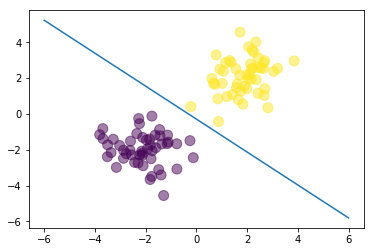

In [16]:
# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)
plt.show()